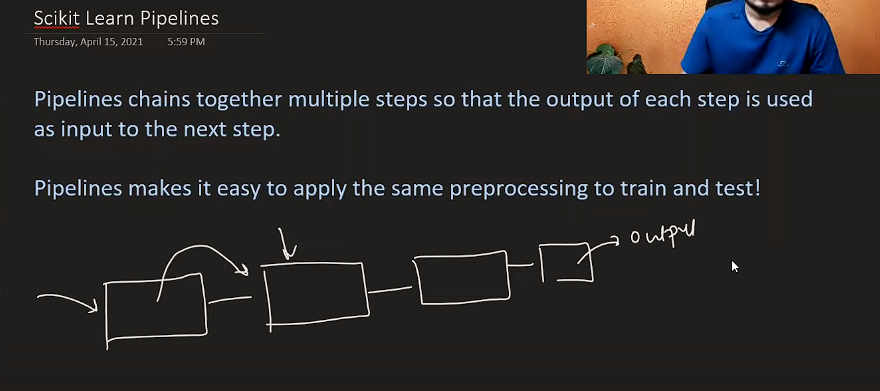

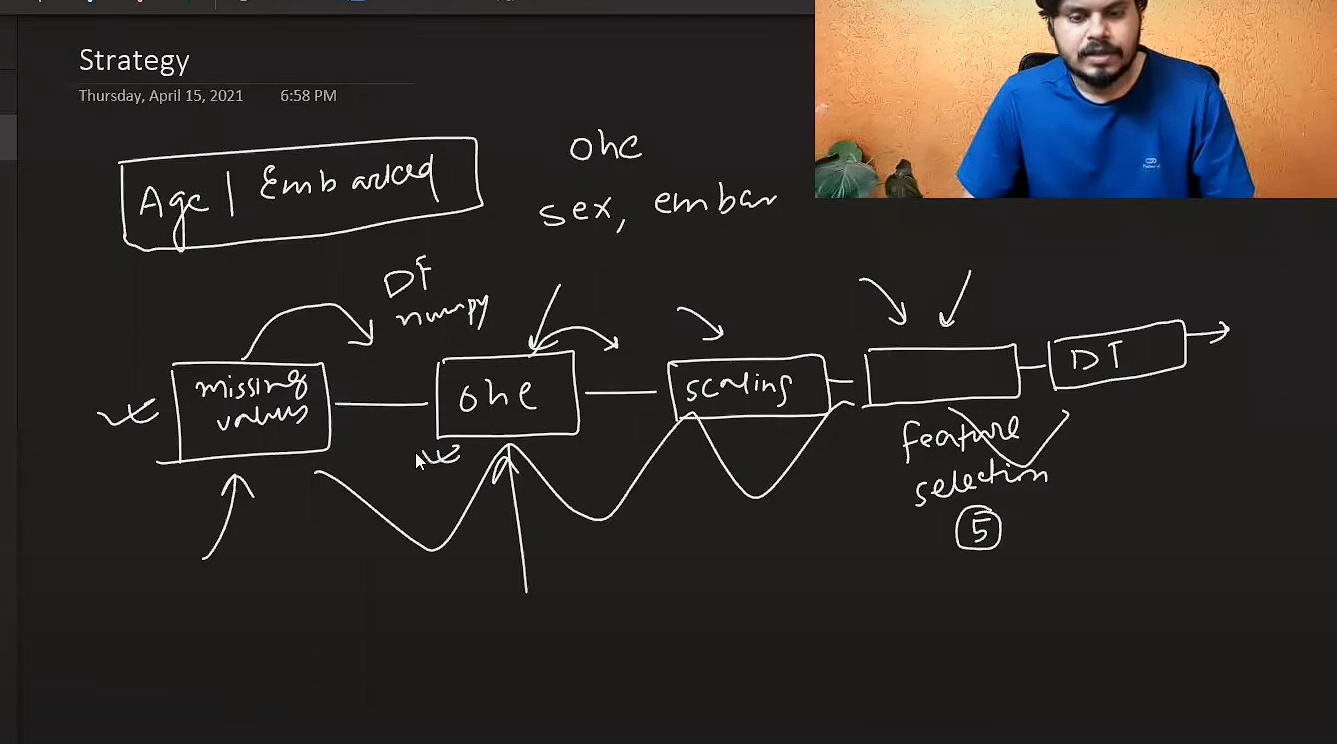

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_excel('dummy_dataset_column_transformers.xlsx')

In [3]:
df.sample(5)

,Age,Gender,City,Income,Job Title,Education Level,Years of Experience,Hours Worked Per Week,Marital Status,Has Vehicle,Loan Amount (USD),Credit Score
769,42,Female,Houston,64840.64,Artist,Bachelor,35,56,Single,No,40707.07,819
364,61,Male,Los Angeles,89270.49,Teacher,High School,29,27,Divorced,No,20287.06,555
624,37,Other,Houston,133191.83,Artist,Bachelor,28,40,Married,No,37924.76,589
418,39,Female,New York,141923.43,Teacher,PhD,19,34,Single,No,26781.12,682
308,50,Other,Los Angeles,47728.12,Doctor,Master,4,27,Single,No,30147.37,746


In [4]:
df.isnull().sum()

Age                      0
Gender                   0
City                     0
Income                   0
Job Title                0
Education Level          0
Years of Experience      0
Hours Worked Per Week    0
Marital Status           0
Has Vehicle              0
Loan Amount (USD)        0
Credit Score             0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Credit Score']),
                                                 df['Credit Score'],
                                                 test_size=0.2,
                                                random_state=42)

In [6]:
X_train

,Age,Gender,City,Income,Job Title,Education Level,Years of Experience,Hours Worked Per Week,Marital Status,Has Vehicle,Loan Amount (USD)
29,37,Male,Chicago,68018.90,Artist,Bachelor,18,39,Single,No,19205.50
535,19,Other,Chicago,99009.53,Artist,Master,24,44,Divorced,No,32695.72
695,53,Male,New York,126142.92,Lawyer,PhD,0,26,Single,Yes,33133.65
557,52,Other,Los Angeles,47031.21,Teacher,PhD,26,30,Divorced,No,5942.35
836,36,Female,Houston,32869.79,Engineer,High School,16,52,Divorced,No,22646.26
...,...,...,...,...,...,...,...,...,...,...,...
106,60,Other,Phoenix,114026.16,Artist,High School,39,34,Single,No,19053.57
270,18,Female,Phoenix,82572.70,Doctor,Master,36,45,Single,Yes,47027.90
860,56,Female,New York,74746.04,Artist,Master,26,46,Married,No,26760.49
435,34,Other,New York,80601.42,Doctor,Bachelor,13,54,Divorced,No,38440.63


### encoding transformer
#### one hot encoding
#### ordinal encoding

In [7]:
from sklearn.compose import ColumnTransformer

In [8]:
#one_hot_transormer
# transformer2 = ColumnTransformer([('ohe_gender',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),[1]),
#                                   ('ohe_City' , OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),[2]),
#                                   ('ohe_Job Title',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),[4]),
#                                   ('ohe_Marital Status',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),[8])
#                                  ],remainder='passthrough')
                                  
                                  

In [9]:
transformer2 = ColumnTransformer([('ohe_gender',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),[1,2,4,8])
                    
                                 ],remainder='passthrough')

In [10]:
#ordinal_encoding transformer
transformer1 = ColumnTransformer([('od_Education Level & od_vehicle',
                                   OrdinalEncoder(categories=[['Bachelor', 'High School','Master', 'PhD'],['Yes', 'No']]),
                                   ['Education Level','Has Vehicle']),
                                  ])

## scaling transformer

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
transformer3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,19))
])

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
transformer4 = LogisticRegression()

In [15]:
from sklearn.pipeline import Pipeline,make_pipeline

In [16]:
pipe = make_pipeline(transformer1,transformer2,transformer3,transformer4)

In [17]:
pipe.fit(X_train,y_train)

ValueError: all features must be in [0, 1] or [-2, 0]

In [18]:
print(X_train.shape)

(800, 11)
